## Grupo

227124 Jorge Henrique Monteiro dos Santos

262251 Vitor Mello de Araujo Lima

## Objetivo

Aplicar os vários regressores visto em aula. Busca de hiperparametros.


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from statistics import mean
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV

# Leia

## Leia o arquivo ouro2.csv.


In [9]:
url = "https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/ouro2.csv"
data = pd.read_csv(url, parse_dates=True, index_col = "Data")
data.shape

(1096, 1)

<AxesSubplot:xlabel='Data'>

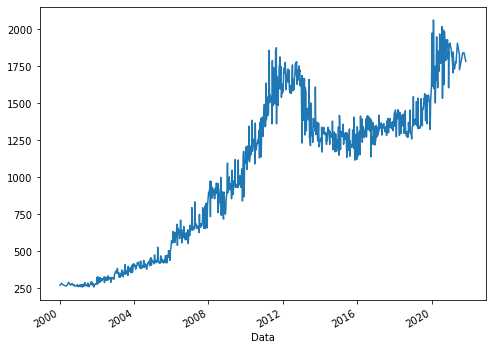

In [11]:
data['Valor'].plot(figsize=(8,6))

# Centering and Normalizing

Não há necessidade de fazer normalização, pois os dados possuem a mesma unidade. Logo não há casos de operações entre dados com unidades ou magnitudes diferentes. 

In [16]:
test_data = data[:100]
train_data = data[100:]

In [79]:
def get_lagged_features(df, n_steps, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps: number of lags, i.e. sequence length
    n_steps_ahead: forecasting horizon
    """
    lag_list = []
    
    for lag in range(n_steps + n_steps_ahead - 1, n_steps_ahead - 1, -1):
        lag_list.append(df.shift(lag))
    lag_array = np.hstack([i[n_steps+n_steps_ahead-1:] for i in lag_list])
    return lag_array

In [84]:
x_train = get_lagged_features(train_data, 4, 1)

array([[1465.5, 1450.9, 1436.6, 1446.8],
       [1450.9, 1436.6, 1446.8, 1432.7],
       [1436.6, 1446.8, 1432.7, 1381.5],
       [1446.8, 1432.7, 1381.5, 1381.9],
       [1432.7, 1381.5, 1381.9, 1349.6]])

In [85]:
y_train =  train_data.values[4:]
y_train_timestamps = train_data.index[4:]
y_train.shape

(992, 1)

In [87]:
from sklearn.linear_model import LinearRegression

tscv = TimeSeriesSplit(n_splits = 5)
lin = LinearRegression()
default_rmes = cross_val_score(lin, x_train, y_train, cv=tscv, scoring='neg_root_mean_squared_error', verbose=2)

print(-mean(default_rmes))

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
23.99829890893112


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
